# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

# Data and Setup
### Importing the necessary python libraries needed for analysis and visualization

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **Reading the Data from a CSV file and using it in a Dataframe format**

In [3]:
df = pd.read_csv('911.csv')

## EDA(Exploratory Data Analysis)
### **Looking at the General details of the entire Dataframe**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions
### 1. What are the top 5 zipcodes for 911 calls?

In [6]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

### 2 .What are the top 5 townships (twp) for 911 calls?

In [7]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

### 3. How many unique title codes are in the 'title' column?

In [8]:
df['title'].nunique()

110

In [9]:
df['title'].head(15)

0          EMS: BACK PAINS/INJURY
1         EMS: DIABETIC EMERGENCY
2             Fire: GAS-ODOR/LEAK
3          EMS: CARDIAC EMERGENCY
4                  EMS: DIZZINESS
5                EMS: HEAD INJURY
6            EMS: NAUSEA/VOMITING
7      EMS: RESPIRATORY EMERGENCY
8           EMS: SYNCOPAL EPISODE
9     Traffic: VEHICLE ACCIDENT -
10    Traffic: VEHICLE ACCIDENT -
11    Traffic: VEHICLE ACCIDENT -
12    Traffic: VEHICLE ACCIDENT -
13    Traffic: VEHICLE ACCIDENT -
14    Traffic: VEHICLE ACCIDENT -
Name: title, dtype: object

## Feature Engineering

### Creating a new column called reason using a lambda expression

In [10]:
df['Reason']=df['title'].apply(lambda x: x.split(':')[0])

## Exploratory data analysis contd.

### 4. What is the most common Reason for a 911 call based off of this new column?

In [11]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

### Visualizing the amount of calls per reason

<Axes: xlabel='Reason', ylabel='count'>

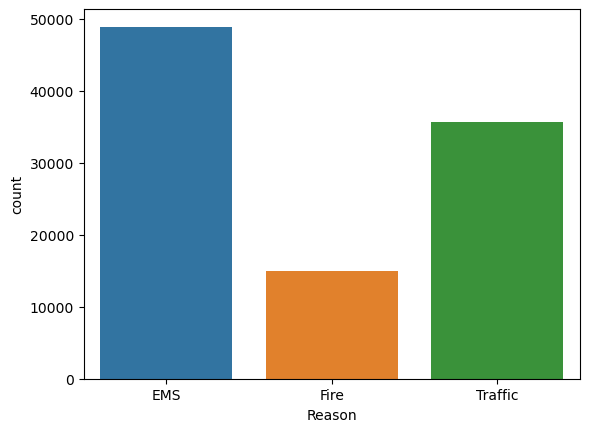

In [12]:
sns.countplot(data=df,x=df['Reason'])

## Feature Engineering

### Engineering new features such as Hour, Month, Day of week into the DataFrame

In [13]:
type(df['timeStamp'].iloc[0])

str

In [14]:
dateStamps = df['timeStamp'].apply(lambda x: pd.to_datetime(x))

In [15]:
dateStamps

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [16]:
df['Hour']=dateStamps.apply(lambda x: x.hour)
df['Month']=dateStamps.apply(lambda x: x.month)
df['Day of Week']=dateStamps.apply(lambda x: x.day_of_week)

In [17]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,2
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,2
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,2
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,2


## Exploratory data analysis contd.

In [18]:
df['Day of Week'].value_counts()

Day of Week
1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: count, dtype: int64

In [19]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [20]:
df['Day of Week'] = df['Day of Week'].map(dmap)

<Axes: xlabel='Day of Week', ylabel='count'>

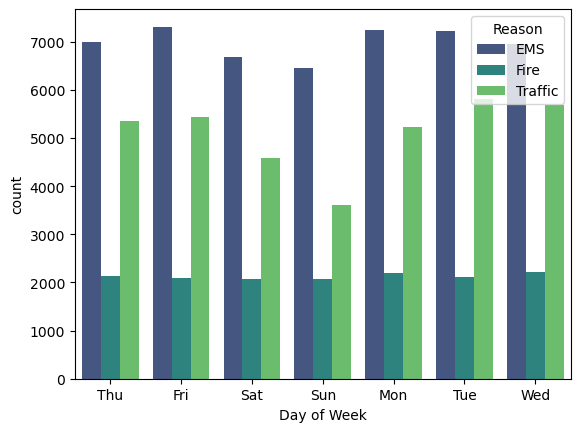

In [21]:
sns.countplot(data=df, x= 'Day of Week',hue='Reason', palette= 'viridis')

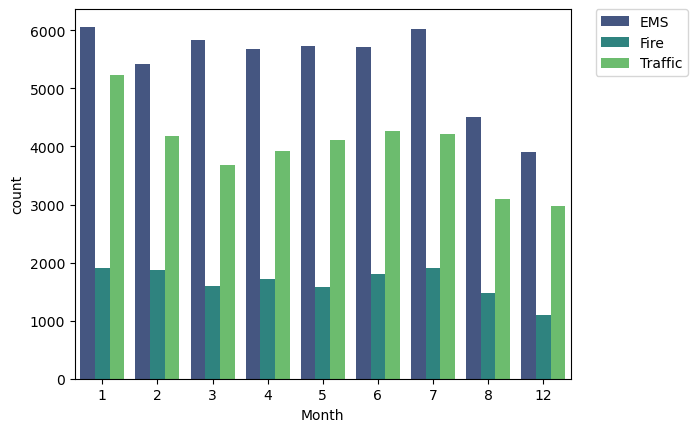

In [22]:
sns.countplot(data=df, x= 'Month',hue='Reason', palette= 'viridis')
# To relocate the legend
plt.legend(bbox_to_anchor =(1.05,1), loc=2,borderaxespad = 0. )

In [23]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<Axes: xlabel='Month'>

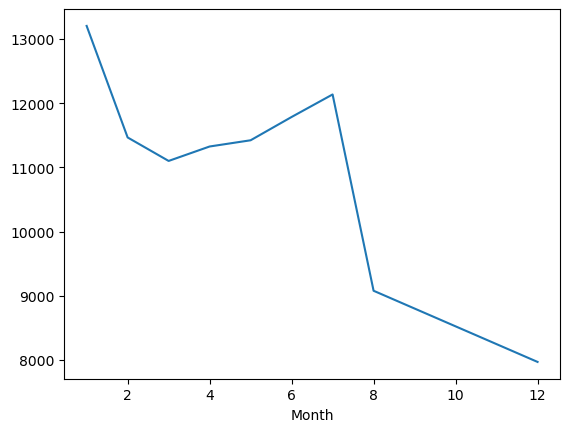

In [24]:
byMonth['lat'].plot()

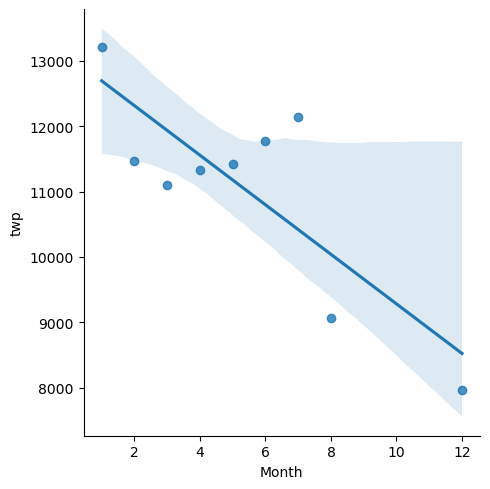

In [25]:
sns.lmplot(data = byMonth.reset_index(),x ='Month', y = 'twp')

In [34]:
df['timeStamp']=df['timeStamp'].apply(lambda x: pd.to_datetime(x))

In [39]:
df['date']=df['timeStamp'].apply(lambda x: x.date())

In [40]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


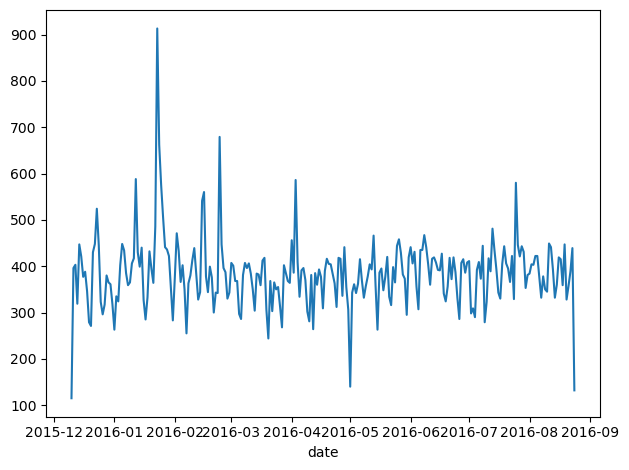

In [44]:
df.groupby('date').count()['lat'].plot()
plt.tight_layout()

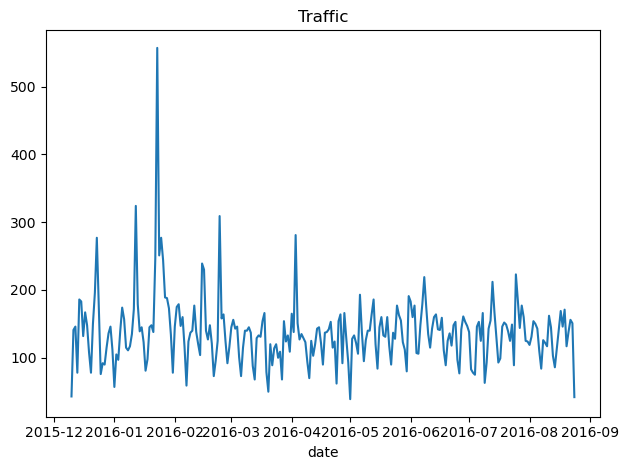

In [62]:
df[df['Reason'] == 'Traffic'].groupby(['date']).count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()
# df

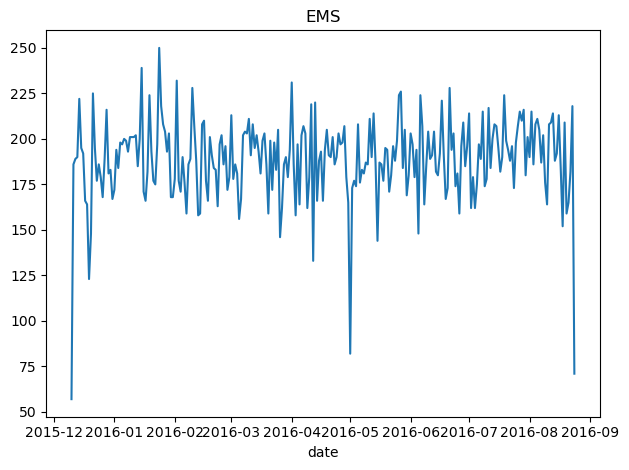

In [66]:
df[df['Reason'] == 'EMS'].groupby(['date']).count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

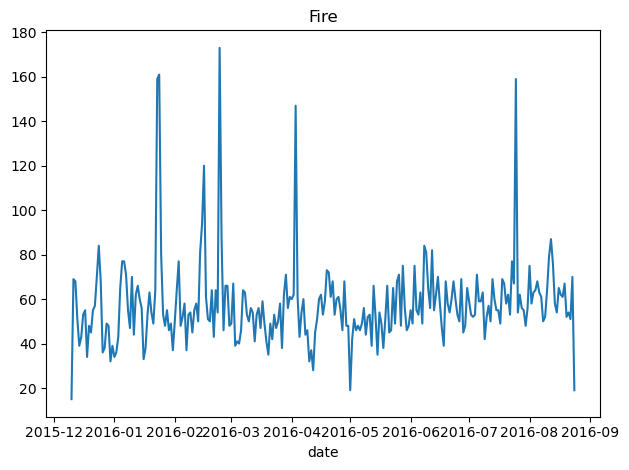

In [68]:
df[df['Reason'] == 'Fire'].groupby(['date']).count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

In [64]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

In [104]:
df_heatmap =df.groupby(by=['Day of Week','Hour']).count()['lat'].unstack()
df_heatmap

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


In [105]:
df_pivot = df.pivot_table(index='Day of Week',columns='Hour',aggfunc='count',values='lat')

<Axes: xlabel='Hour', ylabel='Day of Week'>

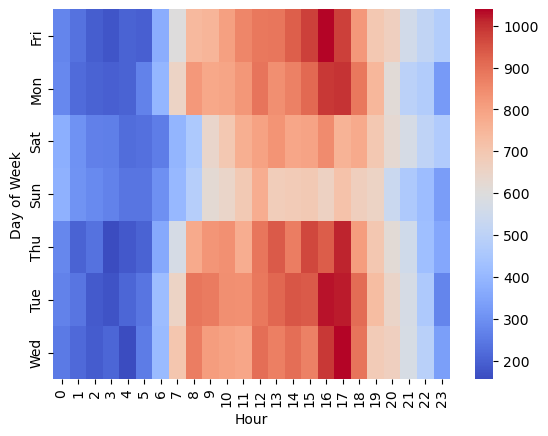

In [106]:
sns.heatmap(df_heatmap, cmap='coolwarm')

<Axes: xlabel='Hour', ylabel='Day of Week'>

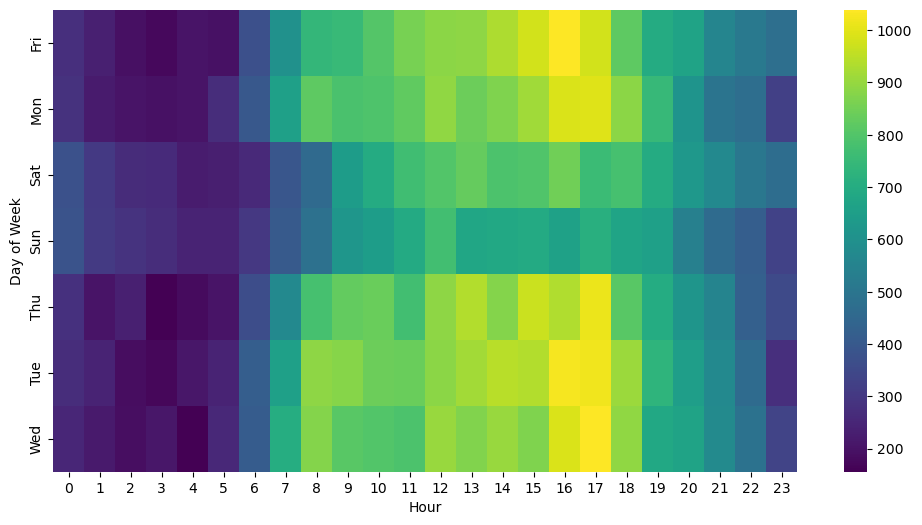

In [107]:
plt.figure(figsize=(12,6))
sns.heatmap(df_pivot,cmap='viridis')

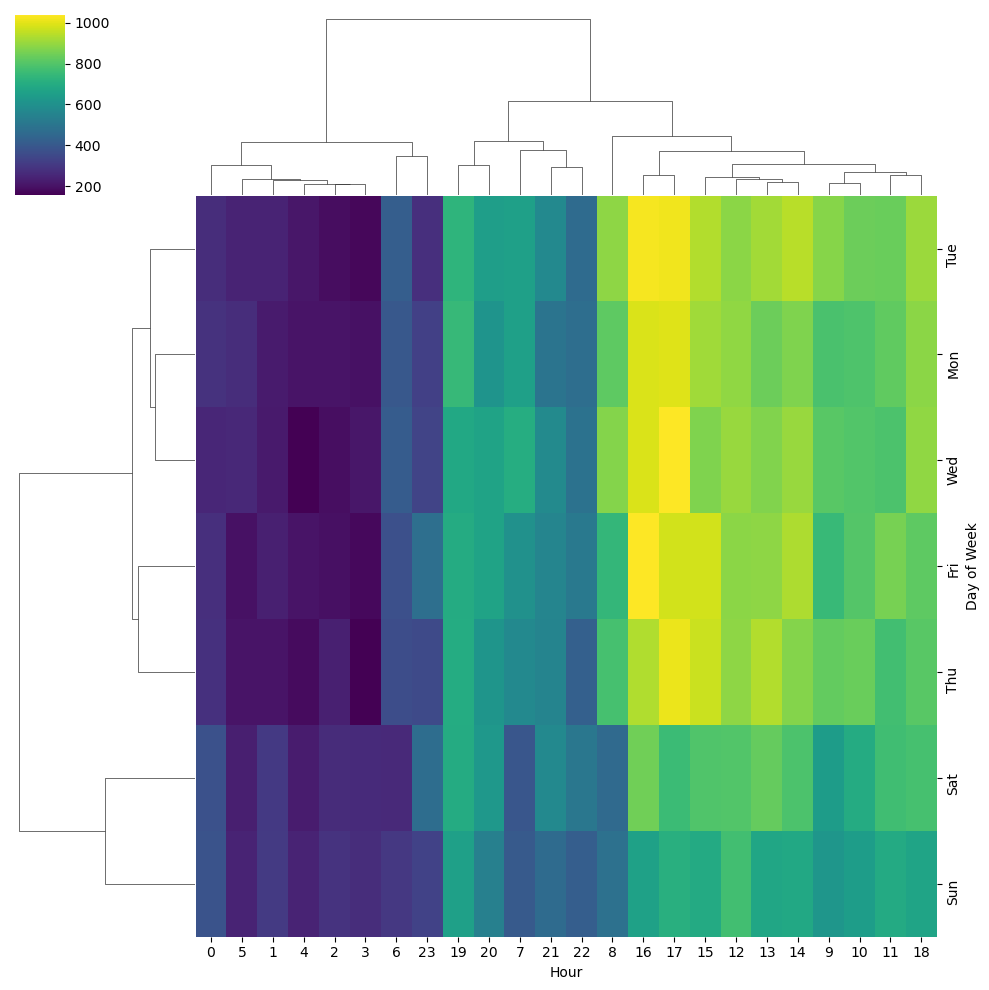

In [108]:
sns.clustermap(df_pivot, cmap='viridis')

In [117]:
df_heatmap_month =df.groupby(by=['Day of Week','Month']).count()['lat'].unstack()
df_heatmap_month

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<Axes: xlabel='Month', ylabel='Day of Week'>

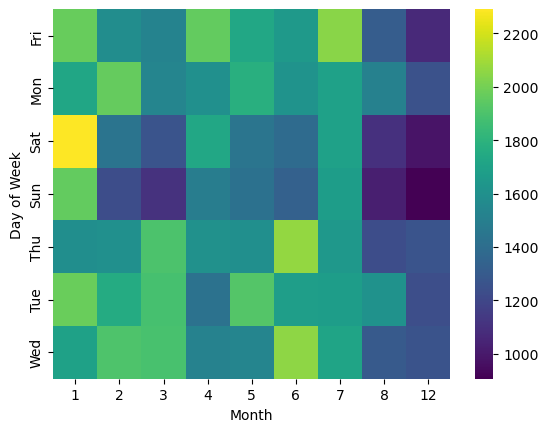

In [118]:
sns.heatmap(df_heatmap_month,cmap='viridis')

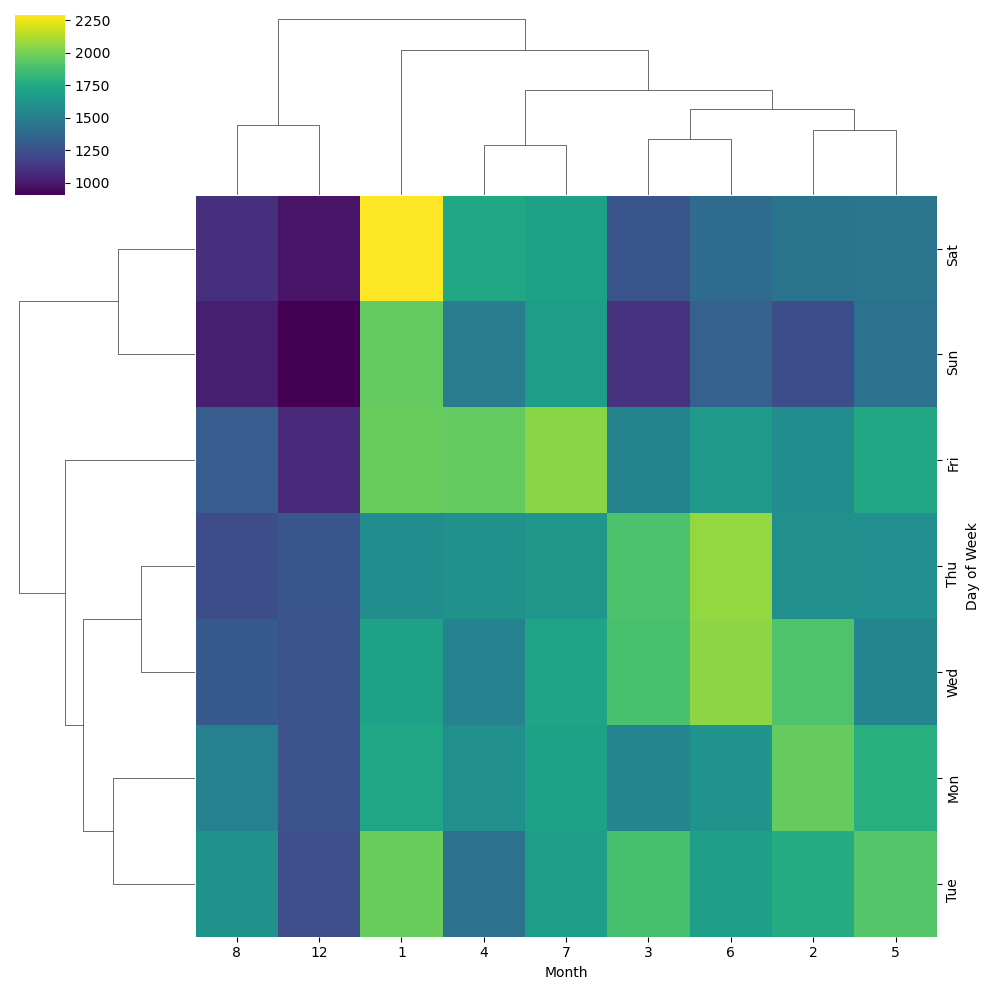

In [120]:
sns.clustermap(df_heatmap_month,cmap='viridis')

## Great Job!